In [1]:
# Import necessary packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import the Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.drop(['PassengerId','Name','Ticket', 'Fare'], axis=1)

In [4]:
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
5,0,3,male,NaN,0,0,NaN,Q
17,1,2,male,NaN,0,0,NaN,S
19,1,3,female,NaN,0,0,NaN,C
26,0,3,male,NaN,0,0,NaN,C
28,1,3,female,NaN,0,0,NaN,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,NaN,C
863,0,3,female,NaN,8,2,NaN,S
868,0,3,male,NaN,0,0,NaN,S
878,0,3,male,NaN,0,0,NaN,S


In [5]:
age = titanic['Age'].median()
titanic = titanic.fillna({"Age":age})

In [6]:
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked


In [7]:
titanic[titanic['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
61,1,1,female,38.0,0,0,B28,NaN
829,1,1,female,62.0,0,0,B28,NaN


In [8]:
titanic['Embarked'].mode()

0    S
dtype: object

In [9]:
emb = titanic['Embarked'].mode()
titanic = titanic.fillna({'Embarked':str(emb)})

In [10]:
titanic[titanic['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked


In [11]:
titanic[['None','C','Q','S']] = pd.get_dummies(titanic['Embarked'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,None,C,Q,S
0,0,3,male,22.0,1,0,NaN,S,0,0,0,1
1,1,1,female,38.0,1,0,C85,C,0,1,0,0
2,1,3,female,26.0,0,0,NaN,S,0,0,0,1
3,1,1,female,35.0,1,0,C123,S,0,0,0,1
4,0,3,male,35.0,0,0,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S,0,0,0,1
887,1,1,female,19.0,0,0,B42,S,0,0,0,1
888,0,3,female,28.0,1,2,NaN,S,0,0,0,1
889,1,1,male,26.0,0,0,C148,C,0,1,0,0


In [12]:
titanic = titanic.drop('None', axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,C,Q,S
0,0,3,male,22.0,1,0,NaN,S,0,0,1
1,1,1,female,38.0,1,0,C85,C,1,0,0
2,1,3,female,26.0,0,0,NaN,S,0,0,1
3,1,1,female,35.0,1,0,C123,S,0,0,1
4,0,3,male,35.0,0,0,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S,0,0,1
887,1,1,female,19.0,0,0,B42,S,0,0,1
888,0,3,female,28.0,1,2,NaN,S,0,0,1
889,1,1,male,26.0,0,0,C148,C,1,0,0


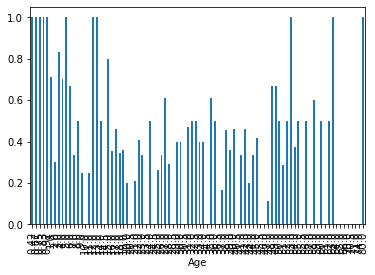

In [13]:
titanic.groupby('Age')['Survived'].mean().plot.bar()


In [14]:
pd.cut(titanic['Age'], 20)

0      (20.315, 24.294]
1       (36.231, 40.21]
2      (24.294, 28.273]
3      (32.252, 36.231]
4      (32.252, 36.231]
             ...       
886    (24.294, 28.273]
887    (16.336, 20.315]
888    (24.294, 28.273]
889    (24.294, 28.273]
890    (28.273, 32.252]
Name: Age, Length: 891, dtype: category
Categories (20, interval[float64]): [(0.34, 4.399] < (4.399, 8.378] < (8.378, 12.357] < (12.357, 16.336] ... (64.084, 68.063] < (68.063, 72.042] < (72.042, 76.021] < (76.021, 80.0]]

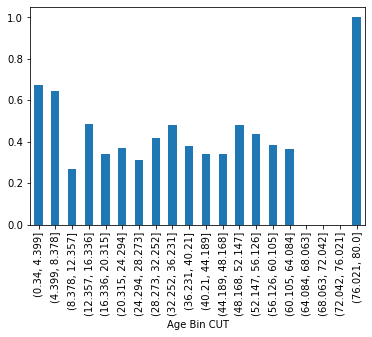

In [15]:
titanic_agebin = titanic.copy()
titanic_agebin['Age Bin CUT'] = pd.cut(titanic_agebin['Age'], 20)
titanic_agebin.groupby('Age Bin CUT')['Survived'].mean().plot.bar()

========

Training, Testing

In [22]:
#define x
X = titanic[['Age']]# scikit-learn expect a dataframe

In [23]:
#define y

y = titanic['Survived'] #scikit-learn expect pd.Series


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
X_train, y_train

(      Age
 451  28.0
 65   28.0
 505  18.0
 532  17.0
 548  33.0
 ..    ...
 246  25.0
 872  33.0
 771  48.0
 33   66.0
 874  28.0
 
 [668 rows x 1 columns],
 451    0
 65     1
 505    0
 532    0
 548    0
       ..
 246    0
 872    0
 771    0
 33     0
 874    1
 Name: Survived, Length: 668, dtype: int64)

In [27]:
X_test.shape, y_test.shape

((223, 1), (223,))

In [28]:
X_test, y_test

(      Age
 715  19.0
 735  28.5
 254  41.0
 3    35.0
 506  33.0
 ..    ...
 289  22.0
 156  16.0
 456  65.0
 492  55.0
 887  19.0
 
 [223 rows x 1 columns],
 715    0
 735    0
 254    0
 3      1
 506    1
       ..
 289    1
 156    1
 456    0
 492    0
 887    1
 Name: Survived, Length: 223, dtype: int64)

In [29]:
m = LogisticRegression()

In [30]:
m.fit(X_train, y_train)

LogisticRegression()

In [31]:
w = m.coef_
w

array([[-0.00380401]])

In [32]:
b = m.intercept_
b

array([-0.38402423])

In [33]:
# Use the model to make a predictions on the seen data

y_pred_train = m.predict(X_train) 
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
# You can make predictions for unseen data
y_pred_test = m.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred_test)

0.600896860986547

In [36]:
accuracy_score(y_train, y_pred_train)

0.6212574850299402

In [ ]:
'''
X = titanic.drop(['Survived'], axis = 1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =3 )'''

In [ ]:
'''scaler = MinMaxScaler()
scaler.fit(X_train[['Age']])                    # result of ColumnTransformer
Xtrain_scaled = scaler.transform(X_train[['Age']])'''

In [ ]:
#Xtest_scaled = scaler.transform(X_test[['Age']])

In [ ]:
'''
plt.subplot(1,2,1)
plt.hist(Xtest_scaled,density=False)
plt.title('Scaled Test')
plt.ylabel('N')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.hist(X_test["Age"],density=False)
plt.title('Test')
plt.xlabel('Age')'''

Evaluate the Model

In [ ]:
y_pred_train = m.predict(X_train_scaled) 
y_pred_train

In [ ]:
# You can make predictions for unseen data

y_pred_test = m.predict(X_test_scaled)
y_pred_test

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:
accuracy_score(y_train, y_pred_train)

In [ ]:
m.predict_proba(X[['Age']])